In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import sys
import os
sys.path.append(os.path.abspath('../'))
from utils import results_heatmap

# Heatmaps for every tested phenotype

As we have two hyper parameters for the random forest model, I will display the result thanks to a heatmap for the correletion and for the MAE as it will illustrate the dependency to both hyperparameters in one graph

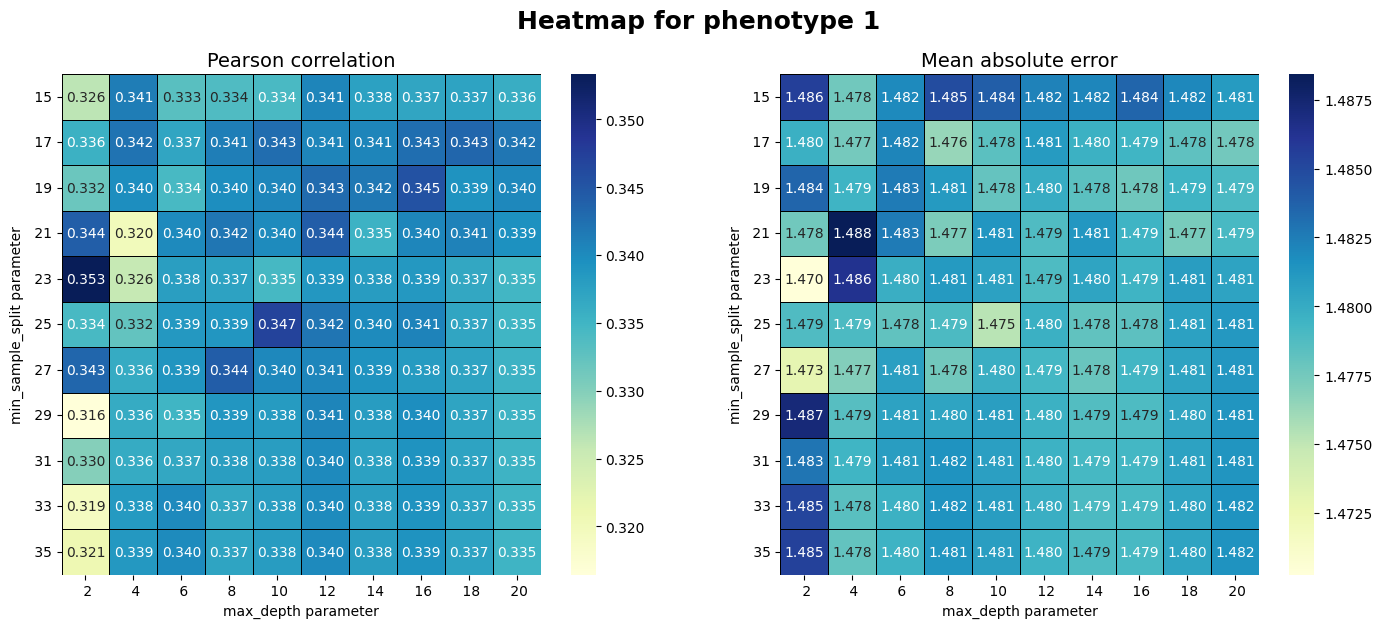

In [2]:
corr_pheno1_df = pd.read_csv("../Results/random_forest_all_100_results_corr_pheno_1.csv", index_col = 0)
MAE_pheno1_df = pd.read_csv("../Results/random_forest_all_100_results_MAE_pheno_1.csv", index_col = 0)

# Update the dataframes to upgrade the resulting graph
corr_pheno1_df.columns = list(map(lambda a: a.split("=")[1] ,corr_pheno1_df.columns))
corr_pheno1_df.index = list(map(lambda a: a.split("=")[1] , corr_pheno1_df.index))

MAE_pheno1_df.columns = list(map(lambda a: a.split("=")[1] ,MAE_pheno1_df.columns))
MAE_pheno1_df.index = list(map(lambda a: a.split("=")[1] ,MAE_pheno1_df.index))

results_heatmap(corr_pheno1_df,
                MAE_pheno1_df,
                f"Heatmap for phenotype 1",
                "Pearson correlation",
                "Mean absolute error",
                "max_depth parameter",
                "min_sample_split parameter")

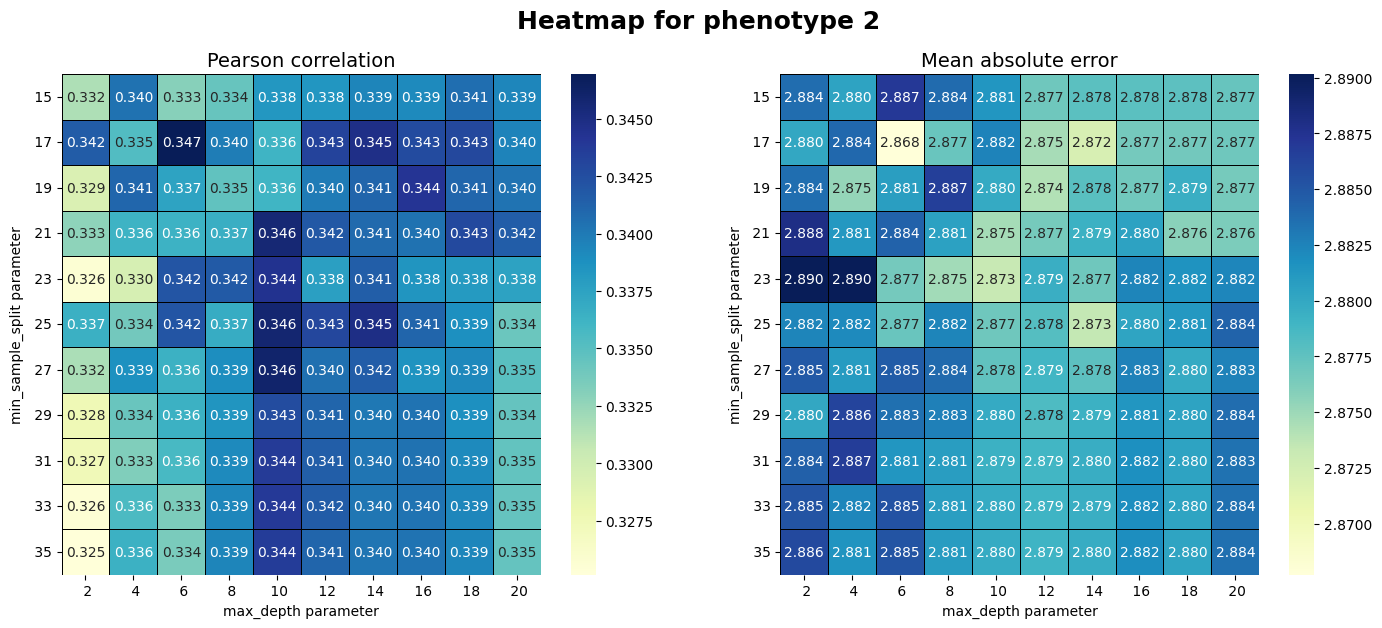

In [3]:
corr_pheno2_df = pd.read_csv("../Results/random_forest_all_100_results_corr_pheno_2.csv", index_col = 0)
MAE_pheno2_df = pd.read_csv("../Results/random_forest_all_100_results_MAE_pheno_2.csv", index_col = 0)

# Update the dataframes to upgrade the resulting graph
corr_pheno2_df.columns = list(map(lambda a: a.split("=")[1] ,corr_pheno2_df.columns))
corr_pheno2_df.index = list(map(lambda a: a.split("=")[1] , corr_pheno2_df.index))

MAE_pheno2_df.columns = list(map(lambda a: a.split("=")[1] ,MAE_pheno2_df.columns))
MAE_pheno2_df.index = list(map(lambda a: a.split("=")[1] ,MAE_pheno2_df.index))

results_heatmap(corr_pheno2_df,
                MAE_pheno2_df,
                f"Heatmap for phenotype 2",
                "Pearson correlation",
                "Mean absolute error",
                "max_depth parameter",
                "min_sample_split parameter")

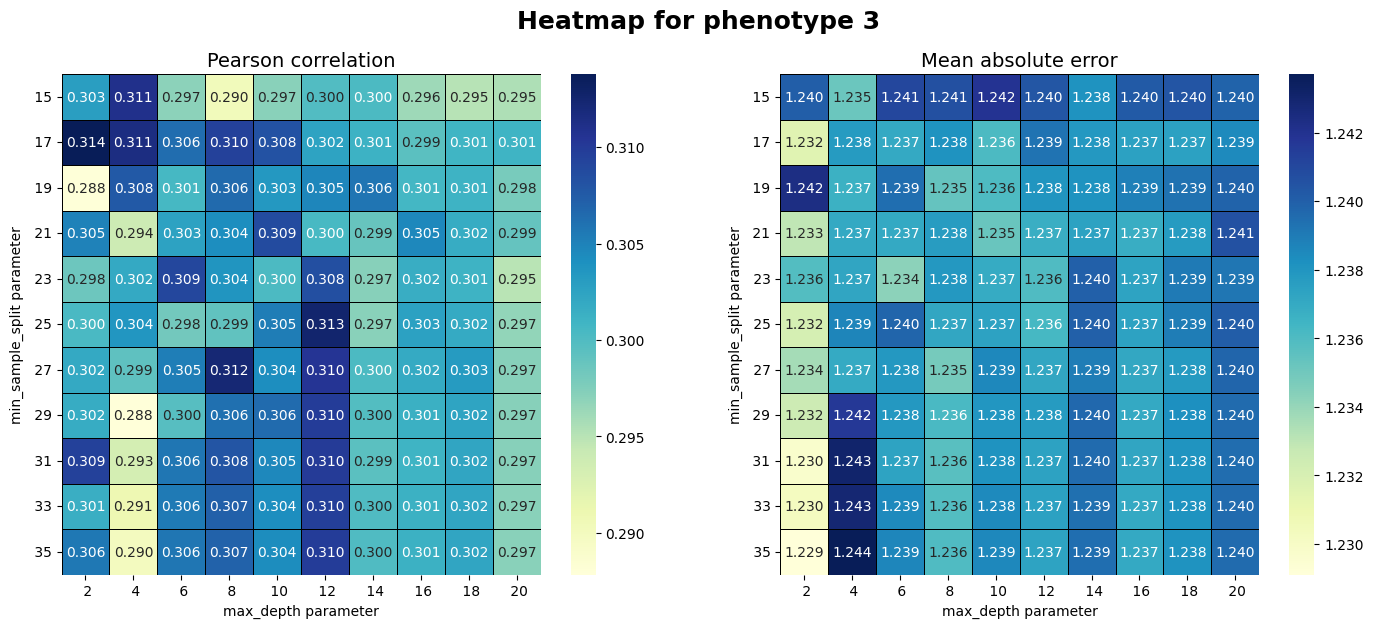

In [4]:
corr_pheno3_df = pd.read_csv("../Results/random_forest_all_100_results_corr_pheno_3.csv", index_col = 0)
MAE_pheno3_df = pd.read_csv("../Results/random_forest_all_100_results_MAE_pheno_3.csv", index_col = 0)

# Update the dataframes to upgrade the resulting graph
corr_pheno3_df.columns = list(map(lambda a: a.split("=")[1] ,corr_pheno3_df.columns))
corr_pheno3_df.index = list(map(lambda a: a.split("=")[1] , corr_pheno3_df.index))

MAE_pheno3_df.columns = list(map(lambda a: a.split("=")[1] ,MAE_pheno3_df.columns))
MAE_pheno3_df.index = list(map(lambda a: a.split("=")[1] ,MAE_pheno3_df.index))

results_heatmap(corr_pheno3_df,
                MAE_pheno3_df,
                f"Heatmap for phenotype 3",
                "Pearson correlation",
                "Mean absolute error",
                "max_depth parameter",
                "min_sample_split parameter")

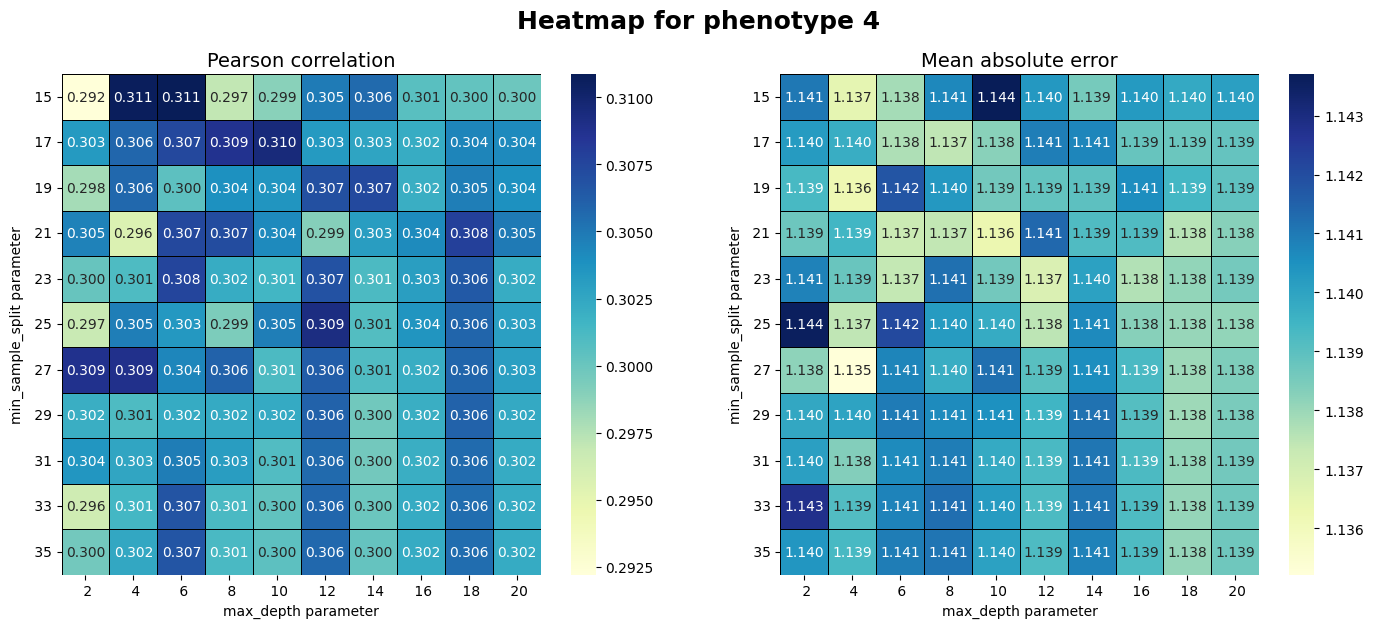

In [5]:
corr_pheno4_df = pd.read_csv("../Results/random_forest_all_100_results_corr_pheno_4.csv", index_col = 0)
MAE_pheno4_df = pd.read_csv("../Results/random_forest_all_100_results_MAE_pheno_4.csv", index_col = 0)

# Update the dataframes to upgrade the resulting graph
corr_pheno4_df.columns = list(map(lambda a: a.split("=")[1] ,corr_pheno4_df.columns))
corr_pheno4_df.index = list(map(lambda a: a.split("=")[1] , corr_pheno4_df.index))

MAE_pheno4_df.columns = list(map(lambda a: a.split("=")[1] ,MAE_pheno4_df.columns))
MAE_pheno4_df.index = list(map(lambda a: a.split("=")[1] ,MAE_pheno4_df.index))

results_heatmap(corr_pheno4_df,
                MAE_pheno4_df,
                f"Heatmap for phenotype 4",
                "Pearson correlation",
                "Mean absolute error",
                "max_depth parameter",
                "min_sample_split parameter")

### Conclusions/analysis:

 - The hyperparameter choice don't impact much the results in both the correlation and the mean absolute error.
 - Setting a higher value for min_sample_split enable to reduce the variability in the results.
 - With a high min_sample_split_parameter, having a big max_depth parameter is useless and yield always to the same results (as the trees ares fully expanded and don't reach the high max_depth).
 - Great values obtained with a low min_sample_split may be obtained thanks to overfitting.

# Choice of the best hyper parameter combinaision

To determine the best combinaison of hyperparameters, I decide to evaluate the sum on all phenotypes (to avoid a choice that lead to overfitting). For the correlation, we take the argmax and for the MAE, we take the argmin.

In [6]:
sum_corr = corr_pheno1_df.add(corr_pheno2_df, fill_value= 0).add(corr_pheno3_df).add(corr_pheno4_df)
sum_corr = sum_corr.to_numpy()
best_corr = np.unravel_index(np.argmax(sum_corr, axis=None), sum_corr.shape)

sum_MAE = MAE_pheno1_df.add(MAE_pheno2_df, fill_value= 0).add(MAE_pheno3_df).add(MAE_pheno4_df)
sum_MAE = sum_MAE.to_numpy()
best_MAE = np.unravel_index(np.argmin(sum_MAE, axis=None), sum_MAE.shape)

if best_corr == best_MAE:
    print("The best hyperparameter choice for both metrics is : ")
    print(f"    - Max_depth: {corr_pheno1_df.index[best_corr[0]]}")
    print(f"    - Min_sample_split: {corr_pheno1_df.columns[best_corr[1]]}")
    print(f"Which gives a sum of correlation of {sum_corr[best_corr]:.8f} and a sum of MAE of {sum_MAE[best_corr]:.8f}")
else:
    print("The best hyperparameter choice for correlation is : ")
    print(f"    - Max_depth: {corr_pheno1_df.index[best_corr[0]]}")
    print(f"    - Min_sample_split: {corr_pheno1_df.columns[best_corr[1]]}")
    print(f"Which gives a sum of correlation of {sum_corr[best_corr]:.8f} and a sum of MAE of {sum_MAE[best_corr]:.8f}")
    print("----------------------------------------------------")
    print("The best hyperparameter choice for MAE is : ")
    print(f"    - Max_depth: {corr_pheno1_df.index[best_MAE[0]]}")
    print(f"    - Min_sample_split: {corr_pheno1_df.columns[best_MAE[1]]}")
    print(f"Which gives a sum of correlation of {sum_corr[best_MAE]:.8f} and a sum of MAE of {sum_MAE[best_MAE]:.8f}")

The best hyperparameter choice for correlation is : 
    - Max_depth:  25
    - Min_sample_split:  12
Which gives a sum of correlation of 1.30680585 and a sum of MAE of 6.73155215
----------------------------------------------------
The best hyperparameter choice for MAE is : 
    - Max_depth:  17
    - Min_sample_split:  6
Which gives a sum of correlation of 1.29770543 and a sum of MAE of 6.72461798


As the correlation is considered as more important than MAE in genomic selection and the difference in MAE is less than the difference in correlation. I conclude that the best hyper parameters choice for random forest is max_depth = 25 and min_sample_split = 12

---
# Second round of experiments

We performed a second run of the same model with two modifications in order to try to find the best model:
- Number of estimators increased from 100 to 1000
- Change min_sample_split to max_features

Here are the results:

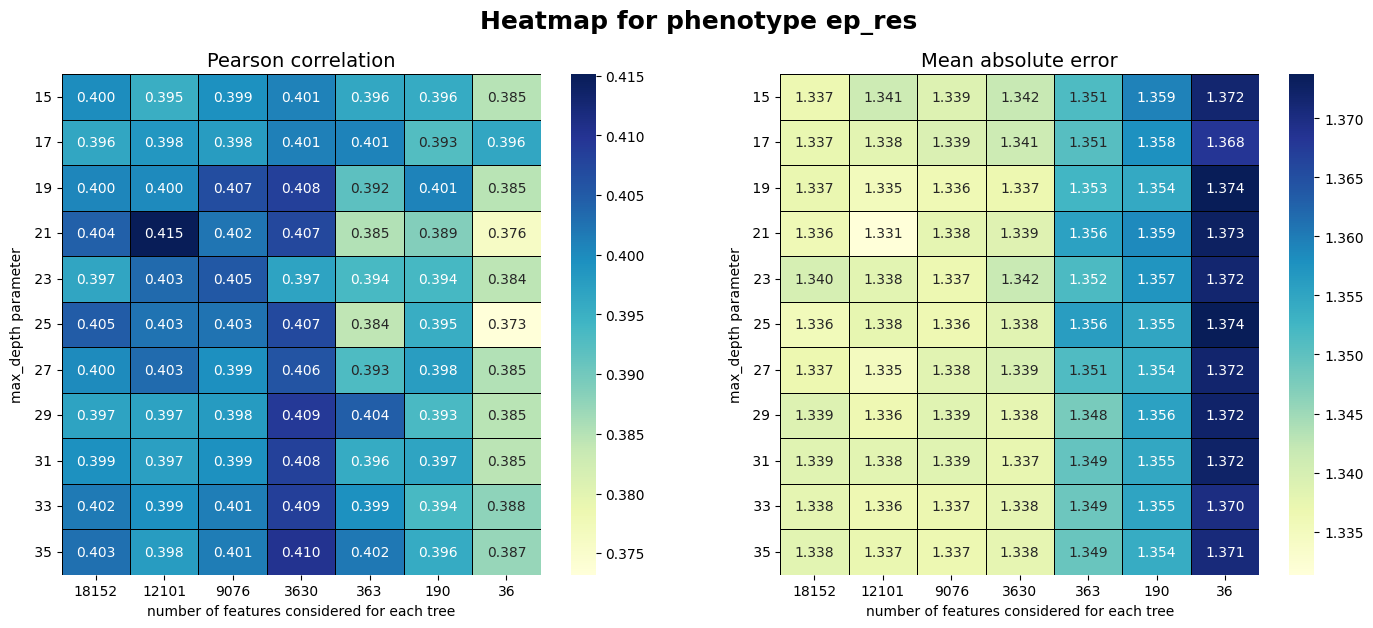

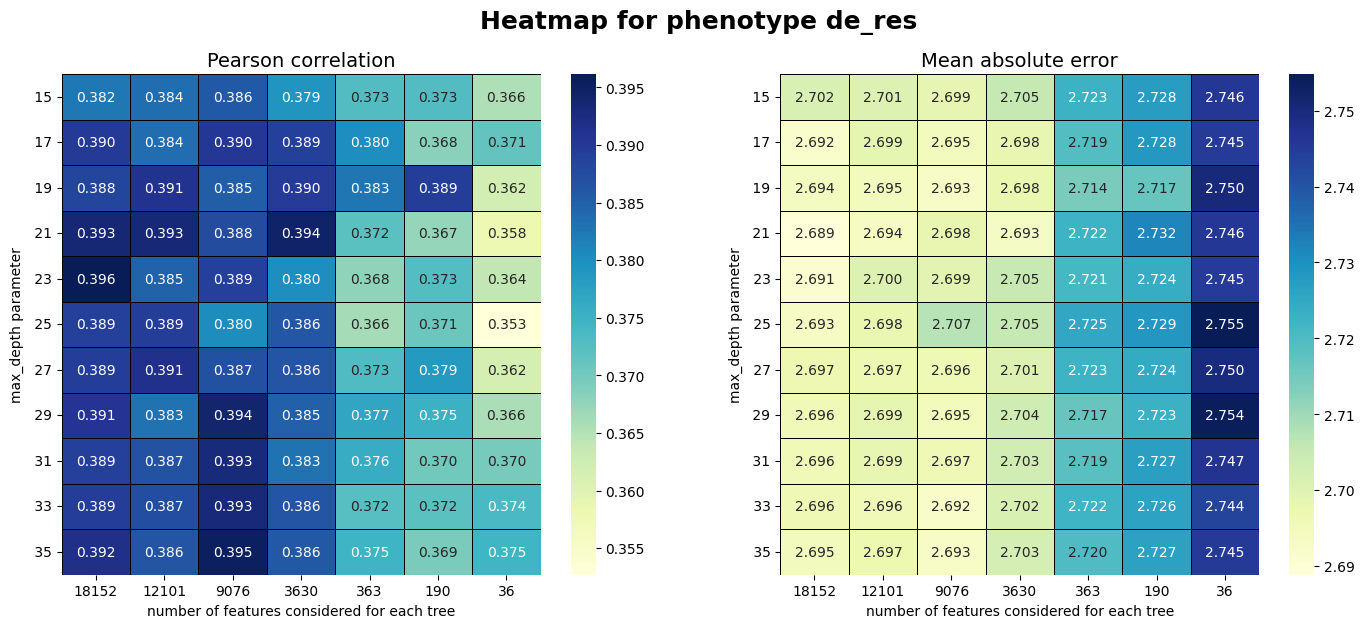

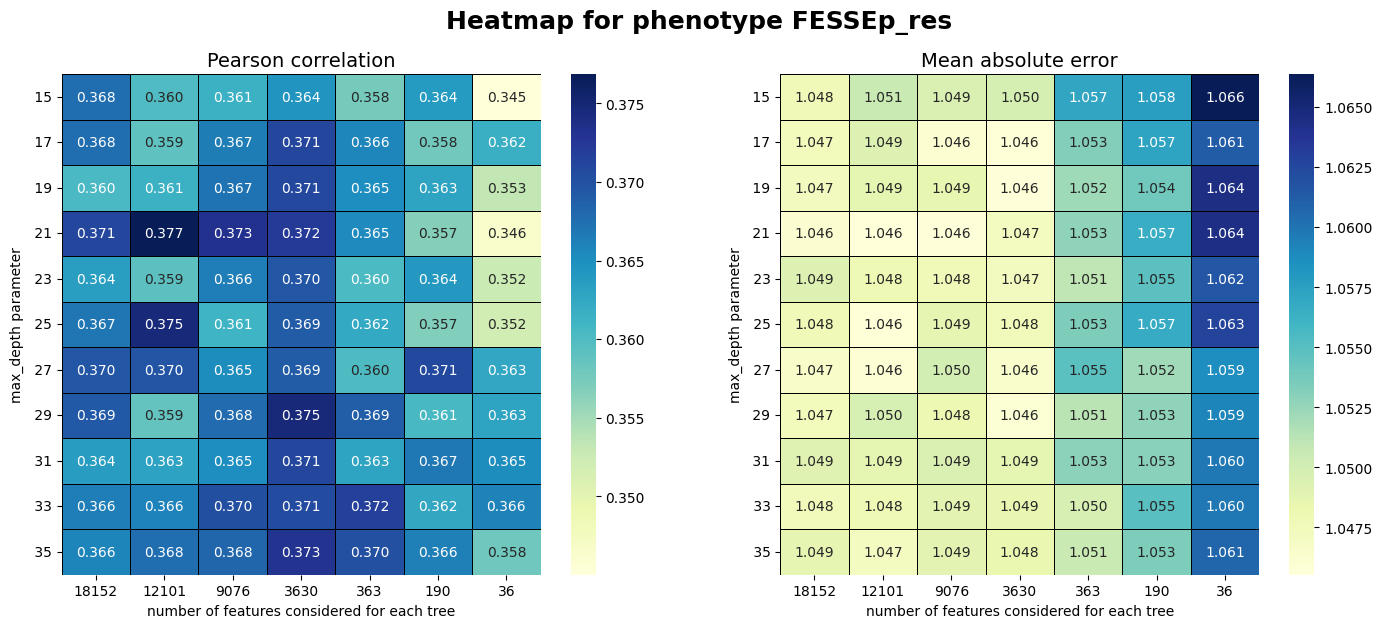

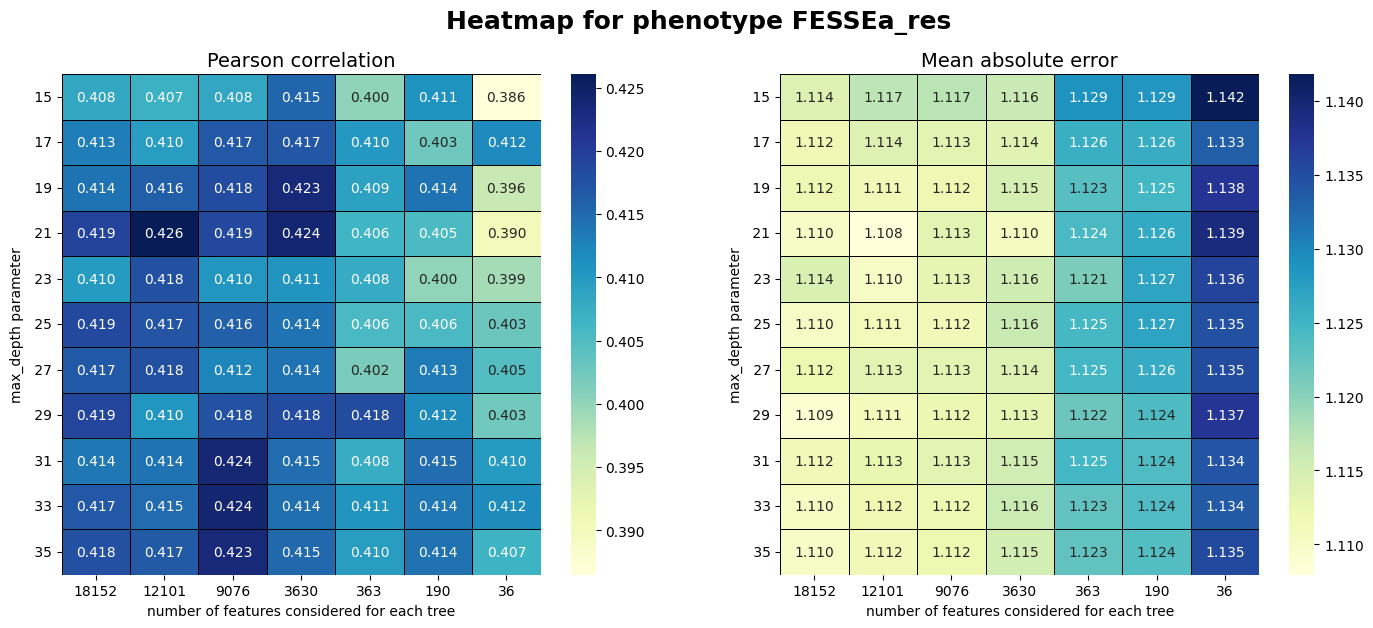

In [7]:
selected_phenotypes = ["ep_res","de_res","FESSEp_res","FESSEa_res"]


for phenotype in selected_phenotypes:
    corr_df = pd.read_csv(f"../Results/random_forest_all_1000_results_corr_{phenotype}.csv", index_col = 0)
    MAE_df = pd.read_csv(f"../Results/random_forest_all_1000_results_MAE_{phenotype}.csv", index_col = 0)

    def format_columns(index):
        NBFEATURE = 36304
        value = index.split("=")[1]
        try:
            return int(value)
        except:
            return int(float(value) * NBFEATURE) 

    # Update the dataframes to upgrade the resulting graph
    corr_df.columns = list(map(format_columns ,corr_df.columns))
    corr_df.index = list(map(lambda a: a.split("=")[1] , corr_df.index))

    MAE_df.columns = list(map(format_columns ,MAE_df.columns))
    MAE_df.index = list(map(lambda a: a.split("=")[1] ,MAE_df.index))

    results_heatmap(corr_df,
                    MAE_df,
                    f"Heatmap for phenotype {phenotype}",
                    "Pearson correlation",
                    "Mean absolute error",
                    "number of features considered for each tree",
                    "max_depth parameter")


In [8]:
for i, phenotype in enumerate(selected_phenotypes):
    if i == 0:
        sum_corr = pd.read_csv(f"../Results/random_forest_all_1000_results_corr_{phenotype}.csv", index_col = 0)
        sum_MAE = pd.read_csv(f"../Results/random_forest_all_1000_results_MAE_{phenotype}.csv", index_col = 0)
    else:
        sum_corr = sum_corr.add(pd.read_csv(f"../Results/random_forest_all_1000_results_corr_{phenotype}.csv", index_col = 0))
        sum_MAE = sum_MAE.add(pd.read_csv(f"../Results/random_forest_all_1000_results_MAE_{phenotype}.csv", index_col = 0))

original_df = sum_corr
sum_corr = sum_corr.to_numpy()
best_corr = np.unravel_index(np.argmax(sum_corr, axis=None), sum_corr.shape)
sum_MAE = sum_MAE.to_numpy()
best_MAE = np.unravel_index(np.argmin(sum_MAE, axis=None), sum_MAE.shape)

if best_corr == best_MAE:
    print("The best hyperparameter choice for both metrics is : ")
    print(f"    - Max_depth: {original_df.index[best_corr[0]].split('=')[1]}")
    print(f"    - Max_feature: {original_df.columns[best_corr[1]].split('=')[1]}")
    print(f"Which gives a sum of correlation of {sum_corr[best_corr]:.8f} and a sum of MAE of {sum_MAE[best_corr]:.8f}")
else:
    print("The best hyperparameter choice for correlation is : ")
    print(f"    - Max_depth: {original_df.index[best_corr[0]].split('=')[1]}")
    print(f"    - Max_feature: {original_df.columns[best_corr[1]].split('=')[1]}")
    print(f"Which gives a sum of correlation of {sum_corr[best_corr]:.8f} and a sum of MAE of {sum_MAE[best_corr]:.8f}")
    print("----------------------------------------------------")
    print("The best hyperparameter choice for MAE is : ")
    print(f"    - Max_depth: {original_df.index[best_MAE[0]].split('=')[1]}")
    print(f"    - Max_feature: {original_df.columns[best_MAE[1]].split('=')[1]}")
    print(f"Which gives a sum of correlation of {sum_corr[best_MAE]:.8f} and a sum of MAE of {sum_MAE[best_MAE]:.8f}")

The best hyperparameter choice for both metrics is : 
    - Max_depth:  21
    - Max_feature:  0.3333333333333333
Which gives a sum of correlation of 1.61133297 and a sum of MAE of 6.17839919


## Analysis
1. **phenotype ep_res:** Significative improvement for both metrics
2. **phenotype de_res:** Significative improvement for both metrics
3. **phenotype FESSEp_res:** Significative improvement for both metrics
4. **phenotype FESSEa_res:** Significative improvement for the correlation. No improvement seen on mean average error.

**Conclusions:** <br>
- Massive improvement in the quality of results (due to a more appropriate number of trees).

### Hyperparameters choice discussion:
- Setting the max_feature parameter to at least 0.1 seems to yield the more stable and accurate results
- The impact of the max_depth parameter seems to be marginal
- The best hyper parameter choice is probably biased by the outstanding performance for all phenotypes besides de_res.

---
# Third round of experiments: one model per phenotype

Here are displayed the results obtained using a random forest for every phenotype using the same model/hyper parameters range than the previous try. The goal is to see if using one model per phenotype increase the quality of the predictions depending on the one obtain predicting the four first given phenotypes. The first results for phenotype 5 and 6 are also described here.

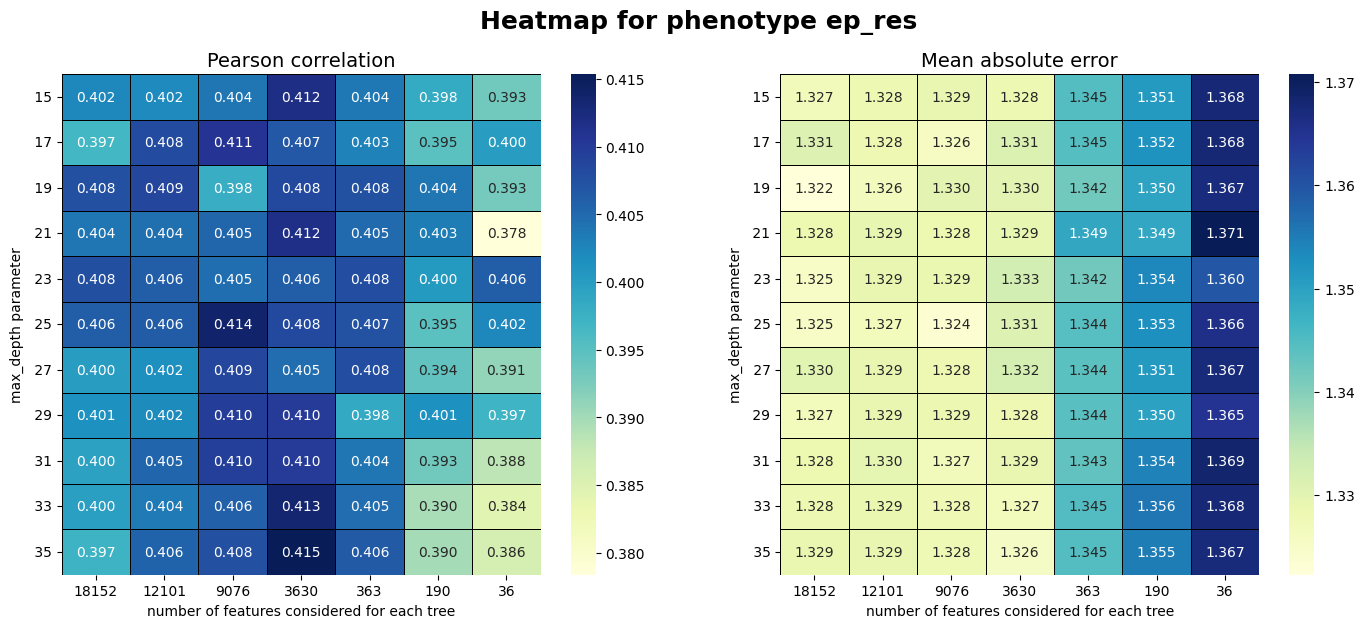

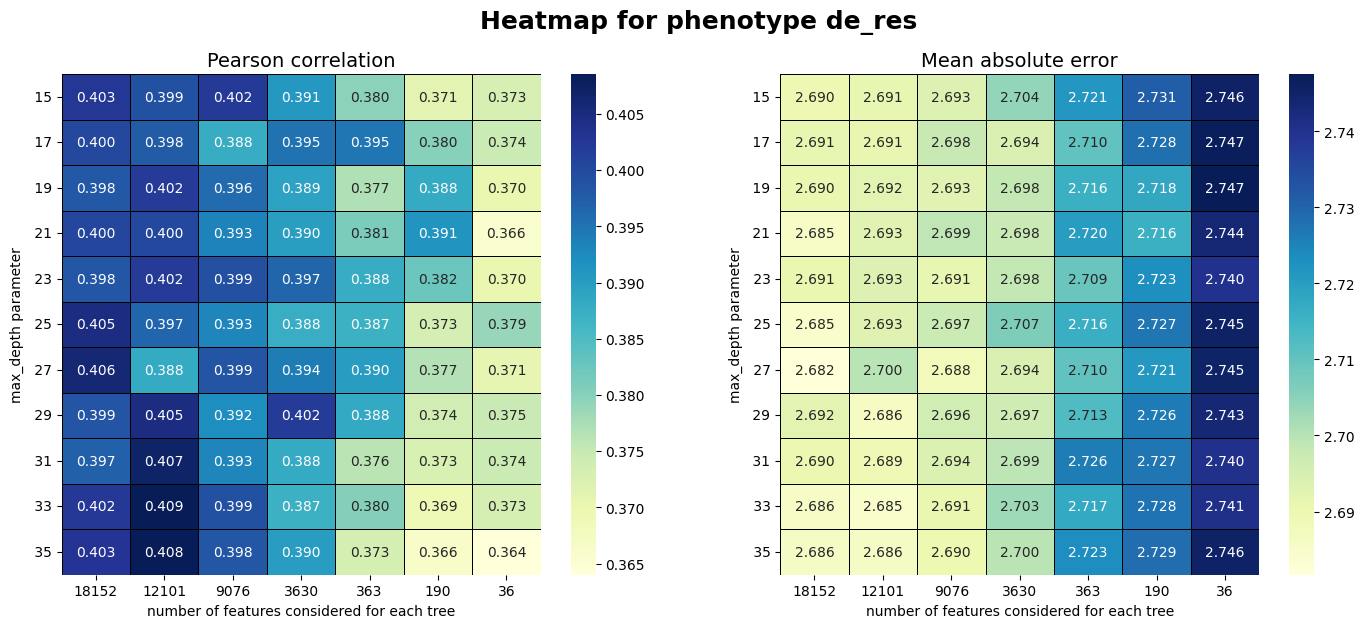

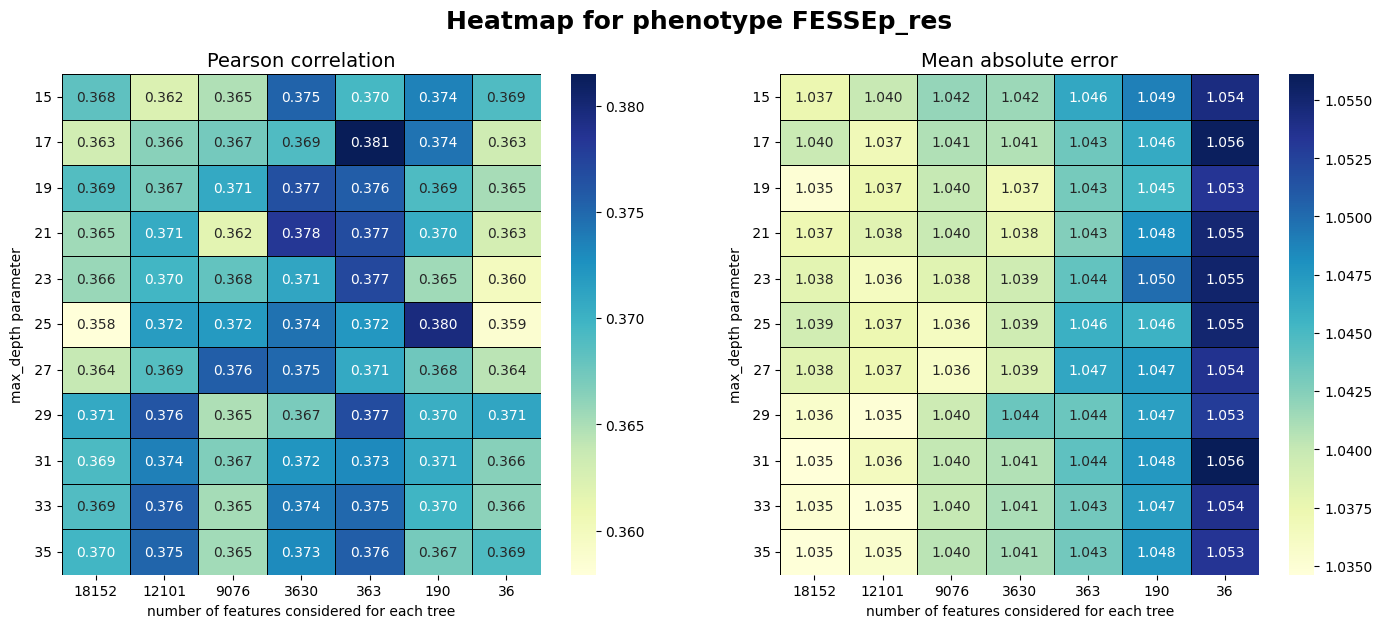

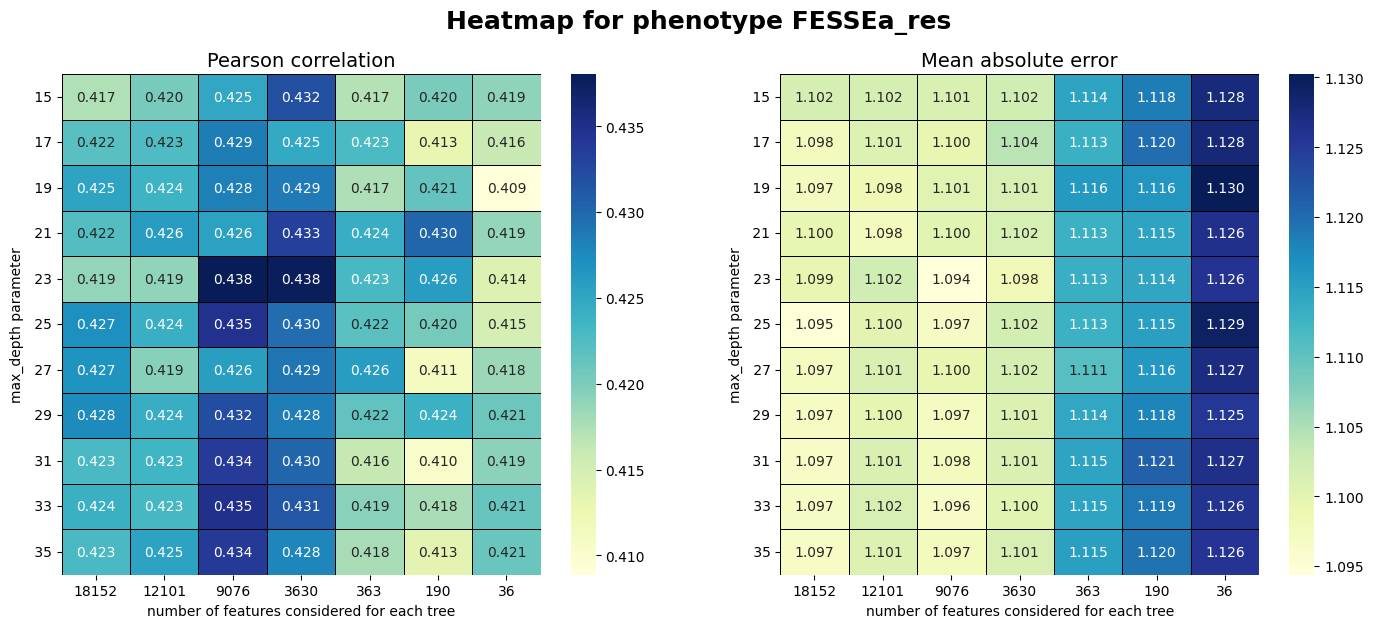

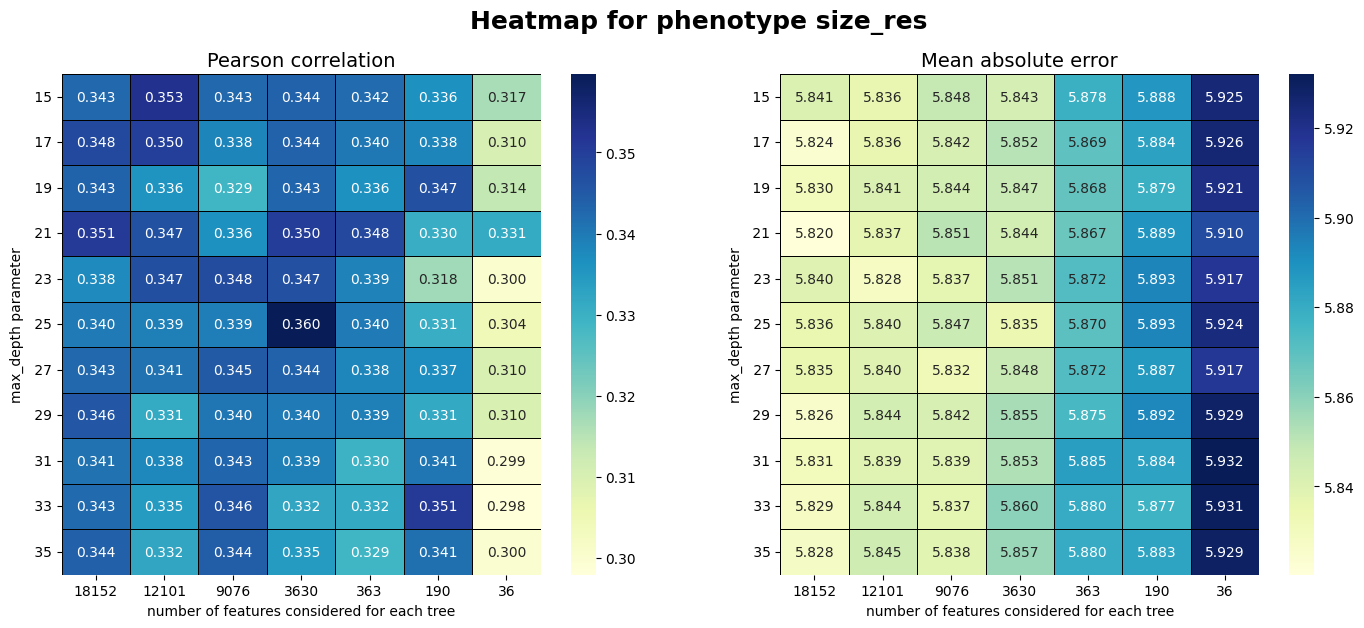

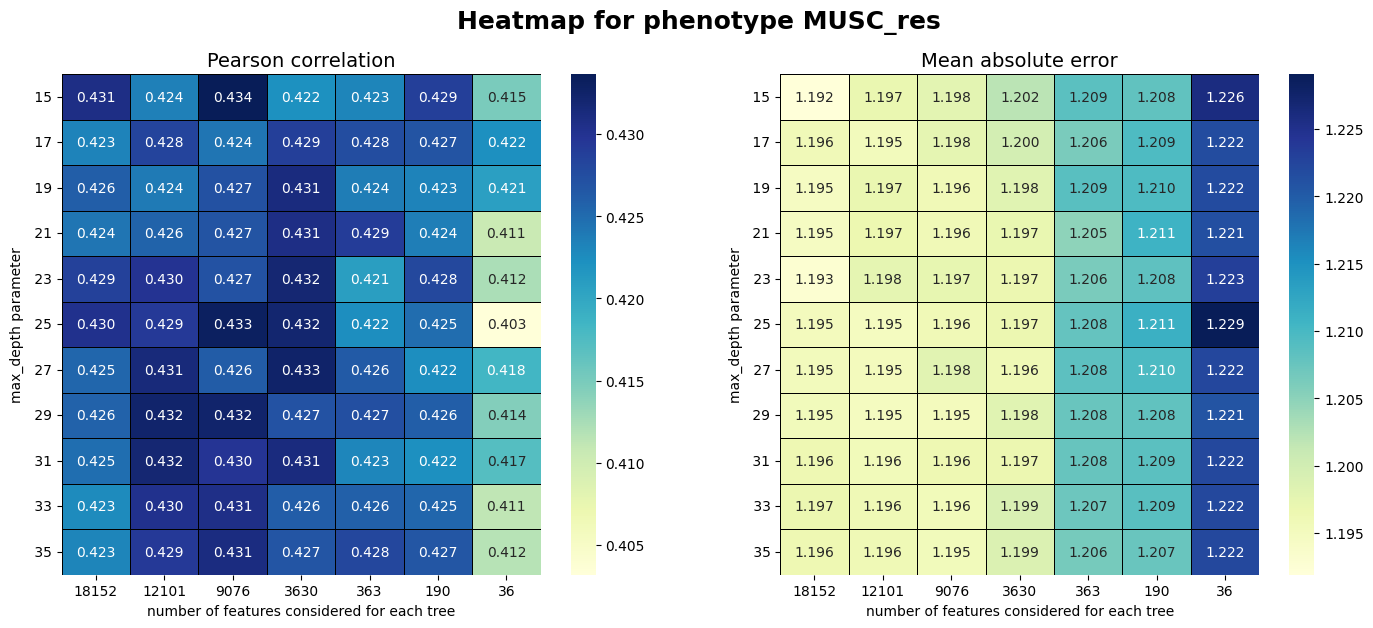

In [9]:
selected_phenotypes = ["ep_res","de_res","FESSEp_res","FESSEa_res", "size_res", "MUSC_res"]

for phenotype in selected_phenotypes:
    corr_df = pd.read_csv(f"../Results/random_forest_1000_results_corr_{phenotype}.csv", index_col = 0)
    MAE_df = pd.read_csv(f"../Results/random_forest_1000_results_MAE_{phenotype}.csv", index_col = 0)

    def format_columns(index):
        NBFEATURE = 36304
        value = index.split("=")[1]
        try:
            return int(value)
        except:
            return int(float(value) * NBFEATURE) 

    # Update the dataframes to upgrade the resulting graph
    corr_df.columns = list(map(format_columns ,corr_df.columns))
    corr_df.index = list(map(lambda a: a.split("=")[1] , corr_df.index))

    MAE_df.columns = list(map(format_columns ,MAE_df.columns))
    MAE_df.index = list(map(lambda a: a.split("=")[1] ,MAE_df.index))

    results_heatmap(corr_df,
                    MAE_df,
                    f"Heatmap for phenotype {phenotype}",
                    "Pearson correlation",
                    "Mean absolute error",
                    "number of features considered for each tree",
                    "max_depth parameter")

## Analysis:
1. **phenotype ep_res:** No improvement for the correlation metrics. The MAE is even a bit worse than before.
2. **phenotype de_res:** Slightly better results for the correletion. No impact seen for the MAE.
3. **phenotype FESSEp_res:** Decent improvement for the correlation at the price of a small loss for the MAE.
4. **phenotype FESSEa_res:** Slightly better improvements in both metrics.
5. **phenotype size_res and phenotype MUSC_res:** No comparaison can be made as it's the first time evaluations with those results.

**Conclusion:** <br>
Using one model per phenotype seems to bring a light improvement for most of the phenotypes which justify the usage of this version from the performance point of view.

In [10]:
for i, phenotype in enumerate(selected_phenotypes):
    if i == 0:
        sum_corr = pd.read_csv(f"../Results/random_forest_1000_results_corr_{phenotype}.csv", index_col = 0)
        sum_MAE = pd.read_csv(f"../Results/random_forest_1000_results_MAE_{phenotype}.csv", index_col = 0)
    else:
        sum_corr = sum_corr.add(pd.read_csv(f"../Results/random_forest_1000_results_corr_{phenotype}.csv", index_col = 0))
        sum_MAE = sum_MAE.add(pd.read_csv(f"../Results/random_forest_1000_results_MAE_{phenotype}.csv", index_col = 0))

original_df = sum_corr
sum_corr = sum_corr.to_numpy()
best_corr = np.unravel_index(np.argmax(sum_corr, axis=None), sum_corr.shape)
sum_MAE = sum_MAE.to_numpy()
best_MAE = np.unravel_index(np.argmin(sum_MAE, axis=None), sum_MAE.shape)

if best_corr == best_MAE:
    print("The best hyperparameter choice for both metrics is : ")
    print(f"    - Max_depth: {original_df.index[best_corr[0]].split('=')[1]}")
    print(f"    - Max_feature: {original_df.columns[best_corr[1]].split('=')[1]}")
    print(f"Which gives a sum of correlation of {sum_corr[best_corr]:.8f} and a sum of MAE of {sum_MAE[best_corr]:.8f}")
else:
    print("The best hyperparameter choice for correlation is : ")
    print(f"    - Max_depth: {original_df.index[best_corr[0]].split('=')[1]}")
    print(f"    - Max_feature: {original_df.columns[best_corr[1]].split('=')[1]}")
    print(f"Which gives a sum of correlation of {sum_corr[best_corr]:.8f} and a sum of MAE of {sum_MAE[best_corr]:.8f}")
    print("----------------------------------------------------")
    print("The best hyperparameter choice for MAE is : ")
    print(f"    - Max_depth: {original_df.index[best_MAE[0]].split('=')[1]}")
    print(f"    - Max_feature: {original_df.columns[best_MAE[1]].split('=')[1]}")
    print(f"Which gives a sum of correlation of {sum_corr[best_MAE]:.8f} and a sum of MAE of {sum_MAE[best_MAE]:.8f}")

The best hyperparameter choice for correlation is : 
    - Max_depth:  21
    - Max_feature:  0.1
Which gives a sum of correlation of 2.39400169 and a sum of MAE of 13.20749109
----------------------------------------------------
The best hyperparameter choice for MAE is : 
    - Max_depth:  21
    - Max_feature:  0.5
Which gives a sum of correlation of 2.36716840 and a sum of MAE of 13.16535082
